# OSP portfolio optimization problem

15 May 2020

We present here the numerical solution for the portfolio optimization problem on social platforms of small number of nodes, for which the matrix-inversion and the vector-matrix multiplication do not pose calculation difficulties, so we use a direct approach to program the solution.

$\textbf{Model}$: We analyze the budget allocation problem where a user has a budget and decides to assign it to some users in order to maximize his/her influence on a online network platform through the participation of the selected users.

In such a platform, there are $N > 2$ users in total. Each user $n$ is considered as a virtual node and has a Newsfeed and a Wall. Suppose the Newsfeed of size $M > 0$ and the Wall of size $K >0$. Furthermore, each user has a set of leaders, $L^{(n)}$, and she/he can be the leader of others. The Newsfeed of $n$ is refreshed instantaneously by insertion of posts published on the Walls of his Leaders. The user visits his Newsfeed and chooses among the currently available posts to re-post on his own Wall with rate $\mu^{(n)}\geq 0$ [posts/unit-time]. Additionally, he produces own posts on his Wall with rate $\lambda^{(n)}\geq 0$. These posts are marked on their generation by the user-author index $(n)$.

$\textbf{Assumptions}$: The choice of which post to share on one's Wall and which post to evict when a new post arrives is uniformly random, among the present posts on the Wall and the Newsfeed. Also, both post-feed processes per user are assumed Poisson.

Consider a particular user $i$. The steady-state probability to find posts from user $i$ on the Newsfeed and Wall of user $n$ is the tuple $(p_i^{(n)},q_i^{(n)})$. With this, we form the steady state column-vectors

$P_{vec}(i):=(P_{vec}(1,i),\ldots,P_{vec}(N,i))=(p_i^{(1)},\ldots,p_i^{(n)})$, and

$Q_{vec}(i):=(Q_{vec}(1,i),\ldots,Q_{vec}(N,i))=(q_i^{(1)},\ldots,q_i^{(n)})$.

These are the steady-state vectors for posts of origin $(i)$ on all the Newsfeeds and Walls of users.

We define the influence of user $i$ on user $n$, $q^{(n)}_i$, as the steady-state probability that a post found on the Wall of user $n$ is of label $i$, i.e., has been originally created by user $i$. Note that these probabilities are performance parameters that will be the output of the developed models. We propose the following metric of influence, $\Psi_i =\frac{1}{N-1} \sum_{n \not=i} q^{(n)}_i$.

### Linear System solution (Theorem 2 from paper)

Linear System solution (Theorem 2 from paper)
To find the values of the steady-state vectors $P_{vec}(i)$ and $Q_{vec}(i)$, one needs to solve the following linear system (formulas $(12)-(13)$):

$(12) \space P_{vec}(i) = AP_{vec}(i) + b(i)$

$(13) \space Q_{vec}(i) = C_{vec}(i) + d(i).$

In the above $A$, $C$ are $N\times N$ matrices and $b(i)$, $d(i)$ are $N\times 1$ column vectors.

$A(j,k) = \frac{\mu^{(k)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(k\in L^{(j)})$,

$b(j,i) = \frac{\lambda^{(i)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(i\in L^{(j)})$,

$C(j,i) = \frac{\mu^{(j)}}{\lambda^{(j)}+\mu^{(j)}}\mathbf{1}(j==i)$,

$d(j,i) = \frac{\lambda^{(i)}}{\lambda^{(i)}+\mu^{(i)}}\mathbf{1}(j==i)$.

### Portfolio Optimization Problem on Online Social Platforms
Let's select one element in the user set $ i\in \mathcal{N}=\{ 1,...,N \}$, and let it be the set $ S = \{i \}$ (this set represents the set where we want to analyze how a joint advertising campaign of the other users is directed to the user i). In turn, suppose that for each post rate of user $n$ different from user $i$, we have $\lambda^{(n)}=a_n \lambda^{(n)}+(1-a_n) \lambda^{(n)}, a_n \in [0,r_n]$, where $a_n$ represents the post rate of user $n$ directed to user $ i $ (that is, directed to advertising) and $1-a_n$ represents the post rate of user $n$ directed to personal use of user $n$ and $r_n$ is the maximun participation rate that the user $n$ can dispose in the advertising campaign.

In our problem framework we have a budget that must not be exceeded $B$, this budget represents the budget limit that the advertising campaign directed to the user $ i $ can cost but don't exceed. Also for each user $ n $, there is a $ c_n $ that represents the cost (in the same scale of $B$) of post over time unit of the user $n$ directed to the advertising campaign. Then the user's individualized budget $ n $ is given by $ B_n = c_n a_n \lambda ^ {(n)}.$

On the other hand, note that if we define the influence of the user $ n \not = i $ directed at advertising towards the set $S $ (denoted by $\Psi_{n,S} (a_n)$), then the only difference between $\Psi_{n, S} (a_n) $ and $ \Psi_n $ is to consider the system as:

$$(\lambda^{(1)},\mu^{(1)}),...,(a_n \lambda^{(n)},\mu^{(n)}) ,...,(\lambda^{(N)},\mu^{(N)}),$$ Instead of: $$(\lambda^{(1)},\mu^{(1)}),...,( \lambda^{(n)},\mu^{(n)}) ,...,(\lambda^{(N)},\mu^{(N)}).$$

In this way, sequentially we can add all the users differents from the user $i$ and so we are interested in maximizing over the set $\{a_n \}_{n \not=i}$ the sum of each influence through the user $ n \not = i $ directed to advertising towards the user $ i $ and the direct influence of the user $ i $, subject to the budget constraint $ B $ not being exceeded by the sum of the individual budgeting of each user $ n \not = i $. 

Namely, the OSP portfolio optimization problem is to find the vector $\{a_n \}_{n \not=i}$ such that: 

$$\max_{ \{a_n \}_{n \not=i} } (\sum_{n \in \mathcal{N}\setminus \{i \} } \Psi_{n,S} (a_n) +\Psi_i ), \textbf{subject to} \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B .$$

The $\{a_n \}_{n \not=i}$ vector corresponds to the vector of participations of the users which act cooperatively with the user $i$ and that provide the maximum influence on a social network platform under cost restrictions with a budget $B$ of user $i$.

Through our results we saw that $ \Psi_{n,S} (a_n)=a_n \Psi_{n}, \forall n \in \mathcal{N}\setminus \{i \}$, in this way, our problem turns out to be the following optimization problem:

$$\max_{ \{a_n \}_{n \not=i} } (\sum_{n \in \mathcal{N}\setminus \{i \} } a_n \Psi_{n}  +\Psi_i ), \textbf{subject to} \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B.$$

which can be solved by linear programming, specifically by the simplex algorithm. 


Let's note that the restriction $\sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B$ can be considered as $\sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)}=B$ in the non-trivial case ($\sum_{n \in \mathcal{N}\setminus \{i \} }  c_n r_n \lambda ^ {(n)}\geq B$) cause if we have the strict inequality, we can always increase an $a_l$ such the influence is strictly increased and we continue to maintain the inequality as the restriction.

### Implementation
$\textbf{Notes}$: For the implementation, we first generate an input from graphs of specific form. We choose here to generate a Erdos-Renyi graph, Albert-Barabasi granp, Ring graph and a Grid graph. Furthermore, we allow the choice of self-posting and re-posting rates.

The implementation will first find the solution with the method desired by the user (M1) or (M2). Consequently, we fill the cost matrix (defined later) and with it, we will compute the numerical solutions of the OSP portfolio optimization problem through the well-known simplex algorithm. Finally, we will give relevant information for the investor point of view and observations. 

As we will see later, the OSP portfolio optimization problem always has a basic feasible solution and the python implementation of simplex algorithm gives it to us. The computational complexity for the OSP portfolio optimization problem is polynomial-time in the number of users with degree at least 3 with the method based on matrix inversion or at least linear with the method based on fixed point convergence. Note that the implementation is not sparse and in in non-symmetric graphs the (M1) outperforms (M2).

In [1]:
%pylab inline
import math
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import scipy.optimize as opt
import networkx as nx
from numpy import inf

Populating the interactive namespace from numpy and matplotlib


We load the functions that we define in the OSP model

In [2]:
%run OSP_Model.ipynb

Populating the interactive namespace from numpy and matplotlib


## 1. Input Graphs
We first would like to generate the input graphs for our Social platform.

We propose four graph categories: (I) Erdos-Renyi Graph, (II) Albert-Barabasi Graph, (III) Ring Graph, (IV) Grid Graph.

For each graph, we need to define: (1) number of users $N$, (2) self- and re-post activity rate N-vectors, $L_{vec}$ and $M_{vec}$ (3) Leader graph (either NxN or list), (4) the cost per post for each user and (5) the user $i$ who orchestrates the advertising campaign.

For the special cases Erdos-Renyi, Albert-Barabasi and Ring Graph, a probability $pr$ in Erdos-Renyi graph $G(N,p)$, the number of edges $m$ to attach from a new node to existing nodes in the Barabasi-Albert model and a radius $R$ should also be defined, which determines the number of leaders per user.

In [3]:
# Number of users in Social graph, pr probability in Erdos-Renyi graph G(N,pr) and m is the number of edges to attach from a new node to existing nodes in the Barabasi-Albert model
N=25
m=3
pr=.2

### I. Erdos-Renyi Graph

We fix the probability $pr$ and a Erdos-Renyi graph $G(N,pr)$ is constructed. Namely by connecting nodes randomly with directed edges where each edge is included in the graph with probability $pr$ independent from every other directed edge. 

Note: In this implementation we assume users indexed from $n=0,...N-1$, and we use lists, so that the entry e.g. $R_{vec}[0]$ refers to the number of leaders for user "0", and similarly $R_{vec}[n]$ for user "n".

In [4]:
Lead=erdos_graph(N,pr) #We select graph structure

We will now draw the produced directed Leader Graph.

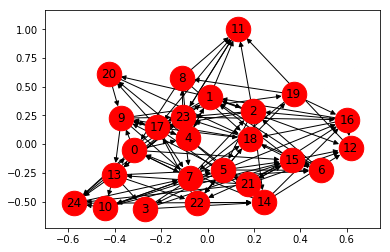

In [5]:
Gring=nx.DiGraph()
for n in range(N):
    ln = list()
    ln = Lead[n]
    for j in range(len(ln)):
        Gring.add_edge(ln[j],n)
pos=nx.spring_layout(Gring,iterations=100)
nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

### II. Albert-Barabasi Graph

In the Albert-Barabasi graph, we begin with an initial complete network of $m$ nodes and $N-m$ new nodes are added to the network one at a time. Each new node is connected to $m$ existing nodes with a bi-directed edge and a probability that is proportional to the number of links that the existing nodes already have, namely $\frac{\text{degree}_i}{\sum_{j \not=i} \text{degree}_j}$ with $\text{degree}_i$ the degree of user $i$. Then, heavily linked nodes tend to quickly accumulate even more links, while nodes with only a few links are unlikely to be chosen as the destination for a new link. 

In [6]:
Lead=barabasi_albert(N, m) #We select graph structure

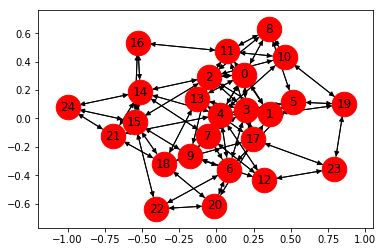

In [7]:
Gring=nx.DiGraph()
for n in range(N):
    ln = list()
    ln = Lead[n]
    for j in range(len(ln)):
        Gring.add_edge(ln[j],n)
pos=nx.spring_layout(Gring,iterations=100)
nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

### III. Ring Graph
we set the symmetric ring graph. Each node follows $R$ users at his right and left, so that in total she/he has $2R$ leaders. Obviously, $2R<N$.

In [8]:
#Ring graph-------------------------------------------------------------------------------------------------------------------
# Inout Radius
# Defines radius in ring for each user
# Radius scenario 1: random with maximum 2R < N
Rhigh = int(N/2)
Rvec1 = np.random.randint(0,Rhigh+1,N)
#
# Radius scenario 2: all users same radius R
R = 2
Rvec2 = R*np.ones(N)
Rvec2 = Rvec2.astype(int)
#
# Radius scenario 3: all users same radius R except user "0"
Rvec3 = list(Rvec2)
Rvec3[0] = 2
Rvec3 = np.asarray(Rvec3)
Rvec3 = Rvec3.astype(int)

In [9]:
LeadRing = ring_graph(N,Rvec1,lead=1,sym=1)

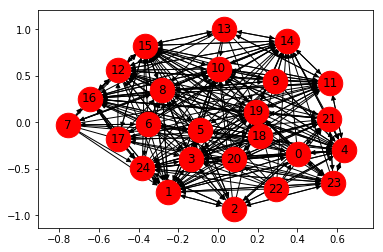

In [10]:
Gring=nx.DiGraph()
for n in range(N):
    ln = list()
    ln = LeadRing[n]
    for j in range(len(ln)):
        Gring.add_edge(ln[j],n)

# Uncomment below to Draw
pos=nx.spring_layout(Gring,iterations=100)
nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

### IV. Grid graph
In the Grid graph, every node has 4 leaders, except the nodes on the 4 vertices of the Grid who have 2 leaders and the nodes on the edges who have 3.

The size of the grid graph should be such that $\sqrt{N}$ is a postive integer.

In [11]:
Lead=grid_graph(N) #We select graph structure

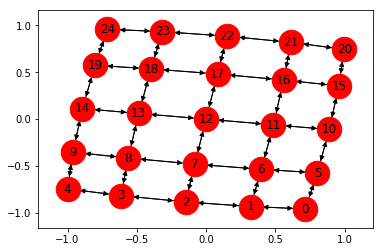

In [12]:
Gring=nx.DiGraph()
for n in range(N):
    ln = list()
    ln = Lead[n]
    for j in range(len(ln)):
        Gring.add_edge(ln[j],n)
pos=nx.spring_layout(Gring,iterations=100)
nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

## 2. General Input

We first define the general input (1),(2) and (3) related to size and activity. So, we could calculate using (M1) or (M2) the influence metric for each user and then we could get the cost per post (4) for each user and get our basic feasible solution 
through the simplex method.

We give three example options for the activity to post and re-post. These are just input examples, and can be chosen arbitrarily, depending on the scenario to be tested.

In [13]:
#General Input (N, Lvec, Mvec)--------------------------------------------------------------------------------------------------
N=200
print("N=",N,'\n') # network size
# Activity
# Activity Scenario case 1: random activity
Amax = 100 #maximum activity rate in the random choice (case 1)
Lvec1 = np.random.uniform(0,Amax, N)
Mvec1 = np.random.uniform(0,Amax, N)
#
Lvec1 = np.round(Lvec1, 5)
Mvec1 = np.round(Mvec1, 5)
# Activity Scenario case 2: symmetric activity
lam = 1.
mu = 1
Lvec2 = lam*np.ones(N, np.float64)
Mvec2 = mu*np.ones(N, np.float64)
#
# Activity Scenario case 3: asymmetric activity for 1 user
lam1 = 10
mu1 = 0.5
Lvec3 = list(Lvec2)
Mvec3 = list(Mvec2)
Lvec3[0] = lam1
Mvec3[0] = mu1
Lvec3 = np.asarray(Lvec3)
Mvec3 = np.asarray(Mvec3)
#
print("Lvec1=",Lvec1,"\n","Mvec1=",Mvec1,"\n")
print("Lvec2=",Lvec2,"\n","Mvec2=",Mvec2,"\n")
print("Lvec3=",Lvec3,"\n","Mvec3=",Mvec3,"\n")

N= 200 

Lvec1= [ 9.17405 97.55719  6.25091  8.90628 87.1108  30.80499 52.94774 49.64229
  6.07596 77.63324 89.79132 27.43145 61.20294 99.90589 84.24988 76.7065
 28.01119 46.93751 83.40999 18.04423 88.69683 94.9084  90.67039 78.29462
 63.15994 87.03659 76.20178 19.04986  2.43884 15.86411 14.11903 51.36677
 86.97901 60.56274  3.9614  82.5706  37.70338 12.03507 15.15349  6.1159
  0.51927 74.64137 25.6457  41.64556 29.45158 48.47583  0.57245 39.71107
 74.41638 37.34407 94.32225 45.31079 90.99737 43.75505  4.08137 85.52674
 36.14567 48.20725  5.04448 74.32654 27.60647 10.40766 90.22695 36.02339
 20.82707 55.7565  80.99833 32.38024 69.54358 12.07998 97.14491 24.99178
 83.12226 90.59242 59.91328 18.31532 18.41017  7.14733 16.41373 72.44702
 90.02216  4.55691 33.88177 90.49936 60.57861 47.75316 86.46398 72.49445
 64.15003 48.5877  20.4584  43.8707  84.03653  6.64974 94.45642  6.63072
 41.59469 67.06925 58.60295 18.21775 31.7887  26.60847 74.51055 41.91531
 89.12678 87.40782 53.35254 64.04433 

#### Input parameter

The input chosen:

In [14]:
print("N=",N,'\n')
Lvec = Lvec1
print("Lvec=",Lvec,'\n')
Mvec = Mvec1
print("Mvec=",Mvec,'\n')

N= 200 

Lvec= [ 9.17405 97.55719  6.25091  8.90628 87.1108  30.80499 52.94774 49.64229
  6.07596 77.63324 89.79132 27.43145 61.20294 99.90589 84.24988 76.7065
 28.01119 46.93751 83.40999 18.04423 88.69683 94.9084  90.67039 78.29462
 63.15994 87.03659 76.20178 19.04986  2.43884 15.86411 14.11903 51.36677
 86.97901 60.56274  3.9614  82.5706  37.70338 12.03507 15.15349  6.1159
  0.51927 74.64137 25.6457  41.64556 29.45158 48.47583  0.57245 39.71107
 74.41638 37.34407 94.32225 45.31079 90.99737 43.75505  4.08137 85.52674
 36.14567 48.20725  5.04448 74.32654 27.60647 10.40766 90.22695 36.02339
 20.82707 55.7565  80.99833 32.38024 69.54358 12.07998 97.14491 24.99178
 83.12226 90.59242 59.91328 18.31532 18.41017  7.14733 16.41373 72.44702
 90.02216  4.55691 33.88177 90.49936 60.57861 47.75316 86.46398 72.49445
 64.15003 48.5877  20.4584  43.8707  84.03653  6.64974 94.45642  6.63072
 41.59469 67.06925 58.60295 18.21775 31.7887  26.60847 74.51055 41.91531
 89.12678 87.40782 53.35254 64.04433 2

Choose between our graphs:

In [15]:
# In case we choose Albert-Barabasi:
#Lead = barabasi_albert(N, m)
# In case we choose Ring:
#Lead = ring_graph(N,Rvec,lead=1,sym=1)
# In case we choose Grid:
#Lead = grid_graph(N)
#
# In case we choose Erdos-Renyi:
Lead = erdos_graph(N,pr)
print("Lead=",Lead)

Lead= [[32, 40, 41, 51, 54, 62, 64, 67, 70, 72, 74, 77, 82, 87, 97, 98, 102, 104, 120, 124, 125, 127, 130, 142, 144, 159, 161, 164, 168, 172, 173, 178, 186, 191, 196], [6, 13, 17, 27, 28, 31, 36, 38, 40, 50, 51, 54, 74, 76, 78, 86, 87, 88, 104, 115, 120, 121, 128, 130, 135, 152, 155, 159, 161, 162, 163, 165, 169, 172, 176, 180, 185, 189, 191, 193, 194, 198], [9, 12, 13, 22, 25, 33, 36, 39, 42, 46, 50, 51, 53, 54, 59, 61, 66, 69, 84, 85, 87, 90, 97, 103, 116, 124, 125, 126, 127, 129, 130, 131, 139, 140, 142, 147, 157, 159, 161, 164, 169, 170, 177, 179, 181, 194], [4, 7, 11, 30, 32, 34, 49, 51, 56, 65, 67, 71, 81, 89, 93, 104, 107, 108, 110, 113, 128, 132, 133, 138, 143, 148, 158, 168, 181, 190, 196], [2, 5, 6, 13, 23, 28, 33, 39, 44, 53, 54, 61, 65, 66, 82, 83, 85, 88, 90, 91, 94, 101, 102, 108, 113, 114, 121, 132, 137, 144, 147, 148, 151, 154, 155, 160, 184, 195], [6, 7, 13, 17, 28, 30, 31, 34, 35, 40, 44, 51, 56, 68, 69, 70, 72, 80, 83, 85, 94, 95, 97, 103, 124, 129, 133, 137, 141, 14

After defining all matrices $A$, $C$ and vectors $b_i$, $d_i$ per label $i$ we can get the matrices composed of the steady-state probabilities $P_{vec}$, $Q_{vec}$ and the influence vector through the method chosen by the user and subsequently we will calculate the cost function defined below.

### Cost Function

We define a cost function in our context of social media platform as a family of non-negative functions $\{ C_n \}_{n \in \mathcal{N}}$ of the form:

$$C_n:\mathcal{G} \times [\lambda_1 \times ... \times \lambda_N] \times [\mu_1 \times ... \times \mu_N] \rightarrow R^{+}\cup \{ 0\}.$$

The function $C_n$ will represent the cost per post agreed by user $i$ and user $n$ of a monetary unit.

Following the recommendations of the web pages https://buffer.com/resources/influencer-marketing-cost, https://buffer.com/library/influencer-marketing-guide and the Instagram money calculator on the web-page https://influencermarketinghub.com/instagram-money-calculator/ allow us to assign a cost estimate of the form $k_1\frac{\text{Number of followers}_n}{1000}$ or $k_2\frac{\text{Average Engagments_n}}{1000}$ with $k_1,k_2$ constants depending on the online social platform and the monetary unit will be dollars or euros. Let's notice that the average engagments is equivalent in our model to the average number of sharings of label of the user $n$ in our social platform, which is the average of the set composed by the steady-state probabilities that a post found on the Wall of a user $l \not=n$ is of label $n$ times the number of followers of user $n$. So, we have that the cost per post is of the form $k_1\frac{\text{Number of followers}_n}{1000}$ or $k_2\Psi_n \frac{\text{Number of followers}_n}{1000}$, in this way we can define our estimate of the cost function as a convex combination of $k_1\frac{\text{Number of followers}_n}{1000}$ and $k_2\frac{\text{Average Engagments_n}}{1000}$, namely in our case: 

$$\gamma k_1\frac{\text{Number of followers}_n}{1000}+(1-\gamma) k_2\Psi_n \frac{\text{Number of followers}_n}{1000}, \gamma \in [0,1].$$

Remember that a desirable property in a cost function is concavity (required in some definitions) which it is in our case as well as the positively linearly homogeneous property (which remains in the number of followers) and for this reason we consider in particular this kind of linear combination and note that the number $1000$ is associated with the public that is potentially influenced by the post from user $n$ and the latter should therefore be invariant through the online network platform regardless of the size of the network. 

Let's observe that the cost function of one user $n$ is by definition independent of the post rate $a_n$ of user $n$ directed to user $i$. However it may be dependent to the the maximun participation rate that the user $n$ can dispose in the advertising campaign.

For the rest of the work we will consider being under a social network platform with structure and income potential like Instagram, namely $(k_1,k_2)=(5,250)$ and for simplicity we will consider $\gamma=\frac{1}{2}$. Therefore our cost function to consider is $\frac{5}{2}\frac{\text{Number of followers}_n}{1000}+\frac{250}{2}\Psi_n \frac{\text{Number of followers}_n}{1000}$. In general we can define a cost function in severals ways, however we prefer to utilize this function of cost because 
the estimated price per post is more realistic and with the minimal hypotheses required to make it a cost function.

In [16]:
#Cost function definition-------------------------------------------------------------------------------------------------------
def Ct(N,Lead,Lvec,Mvec,P,Q,Psi,Follow,restriction,gamma=.5,k1=5,k2=250): #Psi and the Followers is not necessary pass them to the cost function (because it can calculate in). However, we grant it as a parameter for simplicity.
    Cs=np.zeros(N)
    Cs=[gamma*k1*len(Follow[x])/1000+(1-gamma)*k2*Psi[x]*len(Follow[x])/1000 for x in range(N)] #Here we defined the cost of one user like the slide-show (a deterministic quantity): How Much Does Social Media Influencer Marketing Cost?. Namely taking in count that one follower is equal to 1000 followers, we calculated the cost like the sum of $5 times the numbers of followers and $250 times the engagment rate (equivalent to our influence of the user) times the number of followers
    return Cs

And we get the cost per post for each user

In [17]:
[P2,Q2,Psi2] = PM(N,Lvec,Mvec,Lead)
gamma_aux=.5
k1_aux=5
k2_aux=250
Followers=[list() for j in range(N)] #Follower list
for l in range(N):
    for m in Lead[l]:
        Followers[m].append(l)
restric=[1 for x in range(N)]
#restric=[1/2*(x % 3) for x in range(N)]
#restric=np.random.uniform(0,1, N)
Cs=Ct(N,Lead,Lvec,Mvec,P2,Q2,Psi2,Followers,restric,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
print("The cost per post of user are respectively",Cs)

The cost per post of user are respectively [0.10515094434535917, 0.09797263848083246, 0.10161556339021263, 0.08676165846337003, 0.1279856220014535, 0.08315337221967029, 0.11016113744351423, 0.1633128981890533, 0.09651632603784202, 0.10094150229331728, 0.1420527491792974, 0.09591635507145826, 0.10783449148241639, 0.1756002093936314, 0.10524268747778034, 0.1217612820457109, 0.08197896658670148, 0.1007174250476395, 0.10092893736140499, 0.10198110567911954, 0.1225552597964637, 0.11264640558441971, 0.10932624740581347, 0.12093979283649171, 0.11417268158322222, 0.13336448139174115, 0.13122638068593567, 0.10257779582133905, 0.10827104823692477, 0.12863463808183562, 0.07724310218026001, 0.11269006557588371, 0.1294610977471474, 0.1193092701542501, 0.10370452585187173, 0.1450000456523197, 0.11884735464156992, 0.11139558163555235, 0.10739925722317506, 0.09133240768645572, 0.12017782418252511, 0.13810198654470607, 0.0875363366726683, 0.11601789727209955, 0.11057338232941319, 0.10443983649280238, 0

## 3. OSP portfolio optimization numerical solutions

Let's notice that given the elements (1), (2), (3) and (4), then we only have to define the user $i$ who orchestrates the advertising campaign. Once such user $i$ is selected, we can proceed to apply two algorithms.

### Simplex method

We can solve with the simplex method our maximization problem:

$$\max_{ \{a_n \}_{n \not=i} } (\sum_{n \in \mathcal{N}\setminus \{i \} } a_n \Psi_{n}  +\Psi_i ), \textbf{subject to} \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B.$$


And find the vector of advertising rates $\{a_n \}_{n \not=i} $. Note that the problem always has at least one solution for $N>2$ because is upper-bounded due to $a_l \in [0,r_l], \forall l$ and non-empty cause we can consider $a_{j_1}=r_{j_1},...,a_{j_l}=r_{j_l}$ as long as we can add others $r_{j}$´s, $j_1,...,j_l \not= i$ keeping $\sum_{n \in \mathcal{N}\setminus \{i \} }  c_{j_n} r_{j_n} \lambda ^ {(j_n)} \leq B$ and when we stop adding $r_{j}$´s take $a_{j_{l+1}}=\frac{B-\sum_{n \in \mathcal{N}\setminus \{i \} }  c_{j_n} r_{j_n} \lambda ^ {(j_n)}}{ c_{j_{l+1}}\lambda ^ {(j_{l+1})}}$ and the others $a_{j}$´s zero. So it has a supremum and then exists a feasible basic solution and it can be approximated by the simplex method.

Let $\Psi$ the influence vector, $A^{*}=\begin{bmatrix}
c_1\lambda ^ {(1)}&\cdots &c_{i-1}\lambda ^ {(i-1)}& c_{i+1}\lambda ^ {(i+1)}&\cdots &c_N\lambda ^ {(N)} \\
0&\cdots &0& 0&\cdots &0
\end{bmatrix}$, $a^{*}=\begin{bmatrix}
a_1 \\
\vdots\\
a_{i-1}\\
a_{i+1}\\
\vdots\\
a_n
\end{bmatrix}$ and $b^{*}=\begin{bmatrix}
B \\
0
\end{bmatrix}$. Notice that our problem is equivalent to minimize $-\Psi \, a^{*}$ subject to $A^{*}a^{*}=b^{*}$ and $a_l \in [0,r_l]$. Finally, the vector $\{a_n \}_{n \not=i}$ can be found by the simplex method.

Below we program the OSP portfolio optimization numerical solutions considering to the user $i$ as a participant in the advertising campaign at no cost $a_i = r_i$ and then the solution includes user $i$.

In [18]:
#OSP portfolio optimization solutions with simplex method-------------------------------------------------------------------------------------------
def OSPS(N,Lead,Lvec,Mvec,Budget,Me,i,Follow,restriction,gamma=gamma_aux,k1=k1_aux,k2=k2_aux): #i index over advertising campaign between [0,N-1]
    #This function solves our OSP portfolio optimization problem, it receives: the number of users N, vector of leader for each user, 
    #vector of user activity corresponding to post and re-post rates, a Budget>=0, a specific algorithm to use (Me=0 closed-form algorithm or in other case fixed-point algorithm),
    #and an user i where our advertising campaign is applied between [0,N-1] and it returns between other things, the values of the decision variables 
    #that maximizes the objective function while satisfying the constraints and the optimal value of the objective function
    StartT = time.time()
    if Me==0:
        [P,Q,Psi]=InvM(N,Lvec,Mvec,Lead)
    else:
        [P,Q,Psi]=PM(N,Lvec,Mvec,Lead)
    Cs=Ct(N,Lead,Lvec,Mvec,P,Q,Psi,Follow,restriction,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
    Maux=sum(Cs)-Cs[i]
    csaux=np.delete(Cs,i)
    psiaux=-1.0*(np.delete(Psi,i))
    Laux=np.delete(Lvec,i)
    Aaux=np.array([numpy.multiply(Laux,csaux),[0 for x in range(N-1)]])
    data={'Self-post rate':Lvec,'Re-post rate':Mvec,'Number of followers':[len(Follow[x]) for x in range(N)],'Number of leaders':[len(Lead[x]) for x in range(N)],'Cost per post':Cs,'Influence':Psi}
    df = pd.DataFrame(data)
    a_bounds = [[0,restriction[x]] for x in range(N-1)]
    StopT = time.time()
    TotalT = StopT-StartT
    return [opt.linprog(psiaux, method='simplex', A_ub=Aaux, b_ub=[Budget,0], A_eq=None, b_eq=None,bounds= a_bounds ),P,Q,Psi,TotalT,df] 

### Greedy algorithm

Let's define $a^{*}_n \in [0,c_n \lambda ^ {(n)} r_n]$ as $a^{*}_n=c_n \lambda ^ {(n)} a_n, \forall n \not =i$. Therefore, our optimization problem is equivalent to:

$$\max_{ \{a^{*}_n \}_{n \not=i} } (\sum_{n \in \mathcal{N}\setminus \{i \} } a^{*}_n \frac{\Psi_{n} }{c_n \lambda ^ {(n)}} +\Psi_i ), \textbf{subject to} \sum_{n \in \mathcal{N}\setminus \{i \} }  a^{*}_n \leq B.$$

Let $\{i_{k} \}$ the $k$-th maximal index of the set  $\{\frac{\Psi_{n} }{c_n \lambda ^ {(n)}} \}_{n\not= i}$. Observe if we select in a sequential order for $l=1,...,N-1$: $$a_{i_l}=r_{i_l} I_{ c_{i_l} r_{i_l} \lambda ^ {(i_l)} \leq B_{l} }+ \frac{B_{l}}{c_{i_l} \lambda ^ {(i_l)}} I_{ c_{i_l} r_{i_l} \lambda ^ {(i_l)} > B_{l} }$$
With $B_{l}=B-\sum_{k<l} a_{i_k} c_{i_k} \lambda ^ {(i_k)},B_1=B$, then by construction we have that $\sum_{l <N} a_{i_l} c_{i_l} \lambda ^ {(i_l)} \leq B$ and we have our solution vector for the OSP portfolio optimization problem as the following theorem says.


$\mathbf{Theorem.}$ The vector $\{ a_{n} \}_{n \not=i}$ is an solution vector for our OSP portfolio optimization problem and it is the unique solution if $\frac{\Psi_{n_1} }{c_{n_1} \lambda ^ {(n_1)} } \not= \frac{\Psi_{n_2} }{c_{n_2} \lambda ^ {(n_2)} },  \forall n_{1} , n_{2} \not= i$.

The trivial case $\sum_{n \in \mathcal{N}\setminus \{i \} }  c_n r_n \lambda ^ {(n)} > B$ is clear because we are forced to take as a solution $a_{n}=r_{n}, n \not=i$ to get the maximum joint influence. Therefore we will work with the non-trivial case, that is, as we said above without loss of generality with the restriction $\sum_{n \in \mathcal{N}\setminus \{i \} }  a^{*}_n = B$.

Suppose there is a vector ${ \{b_n \}_{n \not=i} },b_n \in [0,r_n], \forall n \not=i $ with
$$\sum_{n \in \mathcal{N}\setminus \{i \} } b_n \Psi_{n}  +\Psi_i \geq \sum_{n \in \mathcal{N}\setminus \{i \} } a_n \Psi_{n}  +\Psi_i, \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n b_n \lambda ^ {(n)} = B.$$ We will proceed by contradiction to prove that $a_n=b_n, \forall n \not=i$.

Let $r$ be the smallest positive integer such that $a_{i_r} \not =0$, then by construction $a_{i_r}= \frac{B-\sum_{k<r} c_{i_k} r_{i_k} \lambda ^ {(i_k)}}{c_{i_r} \lambda ^ {(i_r)}}$ and $a_{i_l}=r_{i_l}, \forall l<r$.

Let's define as above $b^{*}_n=c_n \lambda ^ {(n)} b_n, \forall n \not =i$. Suppose that exists a integer $l$ such that it is the smallest positive integer such that $b_{i_l}<a_{i_l}$. We are going to proceed by contradiction, we have $b^{*}_{i_l}< a^{*}_{i_l}$ and by hypothesis $$\sum_{k=1,...,N-1} b^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \geq \sum_{k=1,...,N-1 } a^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \iff \sum_{k=l,...,N-1} b^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \geq \sum_{k=l,...,N-1 } a^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}}.$$

Notice that defining $b^{*}_{i_{j}}=a^{*}_{i_{j}}+d_{j}, j=l+1,...,N-1$, then the equality $\sum_{n=l,...,N-1  }  b^{*}_n =B=\sum_{n=l,...,N-1  }  a^{*}_n$ must be satisfied, then $\sum_{s=l+1,...,N-1} d_{s}=a_{i_l}-b_{i_l}$.

Therefore, $$\sum_{k=l,...,N-1} b^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \geq \sum_{k=l,...,N-1 } a^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \iff  b^{*}_{i_{l}} \frac{\Psi_{{i_{l}}} }{c_{i_{l}} \lambda ^ {({i_{k}})}}+\sum_{k=l+1,...,N-1} b^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \geq  a^{*}_{i_{l}} \frac{\Psi_{{i_{l}}} }{c_{i_{l}} \lambda ^ {({i_{k}})}}+\sum_{k=l+1,...,N-1} a^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \iff$$

$$\iff b^{*}_{i_{l}} \frac{\Psi_{{i_{l}}} }{c_{i_{l}} \lambda ^ {({i_{k}})}}+\sum_{k=l+1,...,N-1} d_{k} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \geq  a^{*}_{i_{l}} \frac{\Psi_{{i_{l}}} }{c_{i_{l}} \lambda ^ {({i_{k}})}} \iff \sum_{k=l+1,...,N-1} d_{k} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \geq  (a^{*}_{i_{l}}-b^{*}_{i_{l}}) \frac{\Psi_{{i_{l}}} }{c_{i_{l}} \lambda ^ {({i_{k}})}}.$$

Observe that $\sum_{k=l+1,...,N-1} d_{k} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \leq \sum_{k=l+1,...,N-1} d_{k} \frac{\Psi_{{i_{l+1}}} }{c_{i_{l+1}} \lambda ^ {({i_{l+1}})}} = (a^{*}_{i_{l}}-b^{*}_{i_{l}}) \frac{\Psi_{{i_{l+1}}} }{c_{i_{l+1}} \lambda ^ {({i_{l+1}})}}$, then $$(a^{*}_{i_{l}}-b^{*}_{i_{l}}) \frac{\Psi_{{i_{l+1}}} }{c_{i_{l+1}} \lambda ^ {({i_{l+1}})}} \geq (a^{*}_{i_{l}}-b^{*}_{i_{l}}) \frac{\Psi_{{i_{l}}} }{c_{i_{l}} \lambda ^ {({i_{k}})}} \iff \frac{\Psi_{{i_{l+1}}} }{c_{i_{l+1}} \lambda ^ {({i_{l+1}})}} \geq \frac{\Psi_{{i_{l}}} }{c_{i_{l}} \lambda ^ {({i_{k}})}}.$$

However, we have a contradiction because $\{i_{l} \}$ is the $l$-th maximal index of the set  $\{\frac{\Psi_{n} }{c_n \lambda ^ {(n)}} \}_{n\not= i}$ and all the elements in this set are differents by hypothesis, then such $l$ does not exist. 

So  $b_{i_l} \geq a_{i_l}, \forall l$. Suppose that exists a integer $l$ such that $b_{i_l}>a_{i_l}$, then we have $$\sum_{n \in \mathcal{N}\setminus \{i \} }  c_n b_n \lambda ^ {(n)} > \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} = B$$ And it is a contradiction. Therefore $b_{i_l}=a_{i_l}, \forall l$. 
 
Note that $\{ a_{n} \}_{n \not=i}$ is a solution because when we exchange all the symbols $\geq$ for $>$, we get contradictions even without the hypothesis $\frac{\Psi_{n_1} }{c_{n_1} \lambda ^ {(n_1)} } \not= \frac{\Psi_{n_2} }{c_{n_2} \lambda ^ {(n_2)} },  \forall n_{1} , n_{2} \not= i$.


Finally, $a_{n}, \forall n \not=i$ is an solution vector and it is the unique solution vector for our OSP portfolio optimization problem and we have the desired.

It is important to note that if $ \exists n_{1} , n_{2} \not= i$ with $\frac{\Psi_{n_1} }{c_{n_1} \lambda ^ {(n_1)} }= \frac{\Psi_{n_2} }{c_{n_2} \lambda ^ {(n_2)} }$, then our solution may not be the only solution, but it is unique module 
the permutations where the elements $\frac{\Psi_{n} }{c_{n} \lambda ^ {(n)}}$ are equal.

Notice that our greedy algorithm has a computational complexity of order $\mathcal{O}(N \ log N)$ (using merge sort to order the set $\{ \frac{\Psi_{n} }{c_{n} \lambda ^ {(n)}} \}_{n \not=i}$) and it can be improved to $\mathcal{O}(N)$ in the average case for some distributions of $\frac{\Psi_{n} }{c_{n} \lambda ^ {(n)}}$. So, it is a good algorithm to use in large data sets

We program our greedy algorithm below

In [19]:
#OSP portfolio optimization solutions-------------------------------------------------------------------------------------------
def OSP(N,Lead,Lvec,Mvec,Budget,Me,i,Follow,restriction,gamma=gamma_aux,k1=k1_aux,k2=k2_aux): #i index over advertising campaign between [0,N-1]
    #This function solves our OSP portfolio optimization problem, it receives: the number of users N, vector of leader for each user, 
    #vector of user activity corresponding to post and re-post rates, a Budget>=0, a specific algorithm to use (Me=0 closed-form algorithm or in other case fixed-point algorithm),
    #and an user i where our advertising campaign is applied between [0,N-1] and it returns between other things, the values of the decision variables 
    #that maximizes the objective function while satisfying the constraints and the optimal value of the objective function
    StartT = time.time()
    if Me==0:
        [P,Q,Psi]=InvM(N,Lvec,Mvec,Lead)
    else:
        [P,Q,Psi]=PM(N,Lvec,Mvec,Lead)
    Cs=Ct(N,Lead,Lvec,Mvec,P,Q,Psi,Follow,restriction,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
    Costs=numpy.multiply(Lvec,Cs)
    actual=[1 for x in range(N)]
    alps=np.zeros(N)
    actual[i]=0
    Baux=Budget
    iList=list(argsort(np.multiply(Psi,np.reciprocal(Costs)),kind="mergesort"))
    iList.remove(i)
    while sum(actual)>0 and Baux>0:
        iaux=iList.pop()
        if Baux>Costs[iaux]*restriction[iaux]:
            actual[iaux]=0
            alps[iaux]=restriction[iaux]
            Baux=Baux-Costs[iaux]*restriction[iaux]       
        else:
            alps[iaux]=Baux/Costs[iaux]
            actual[iaux]=0
            Baux=0
    alps[i]=restriction[i]
    data={'Self-post rate':Lvec,'Re-post rate':Mvec,'Number of followers':[len(Follow[x]) for x in range(N)],'Number of leaders':[len(Lead[x]) for x in range(N)],'Cost per post':Cs,'Influence':Psi}
    df = pd.DataFrame(data)
    StopT = time.time()
    TotalT = StopT-StartT
    return [alps,P,Q,Psi,TotalT,df]

We fix the budget and the user $i$ who orchestrates the advertising campaign

In [20]:
B=50 #Budget
i=1 #User who orchestrates the advertising campaign
print("The maximun participation rates per user in the advertising campaign are:",restric)

The maximun participation rates per user in the advertising campaign are: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


We get the solutions with the simplex method and with our algorithm

In [21]:
#Solutions with simplex method
SS=OSPS(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
solutionsS=SS[0]["x"]
O=np.append(np.append(solutionsS[:i], [0]), solutionsS[i:])
Oaux=O
Oaux[i]=restric[i]
SS[5]['Advertising rate of user']=Oaux
NZ=[]#Vector of rates of selected users in the OSP portfolio optimization solutions
U=[]#Vector of users in the advertising campaign in the OSP portfolio optimization solutions
for x in range(N):
    if O[x]!=0:
        U.append(x)
        NZ.append(O[x])
print("The advertising campaign is over the user:", i,"\n")
print("The users between ", [0,N-1], "to include are:", U,"\n")
print("Their rates are:",np.round(NZ,10),"\n")
print("The joint influence is:",sum(np.multiply(NZ,SS[3][U])))
print("The budget required is:",sum([Lvec[x]*Cs[x]*O[x] for x in U])-Lvec[i]*Cs[i]*O[i])

The advertising campaign is over the user: 1 

The users between  [0, 199] to include are: [0, 1, 3, 5, 8, 27, 28, 30, 34, 37, 38, 42, 43, 46, 54, 58, 63, 69, 74, 77, 93, 99, 111, 112, 117, 126, 127, 130, 157, 168, 179, 186, 187, 196, 197] 

Their rates are: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.61622428 1.         1.         1.         1.
 1.         1.         1.         1.         1.        ] 

The joint influence is: 0.031163892415152834
The budget required is: 50.0


In [22]:
S=OSP(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
solutions=S[0]
US=list()
RA=list()
for x in range(N):
    if solutions[x]!=0:
        US.append(x)
print("The advertising campaign is over the user:", i,"\n")
print("The users between ", [0,N-1], "to include are:", US,"\n")
print("Their rates are:", solutions[US],"\n")
print("The joint influence is:",sum(np.multiply(S[3][US],solutions[US])))
print("The budget required is:",sum([Lvec[x]*Cs[x]*solutions[x] for x in US])-Lvec[i]*Cs[i]*solutions[i])

The advertising campaign is over the user: 1 

The users between  [0, 199] to include are: [0, 1, 3, 5, 8, 27, 28, 30, 34, 37, 38, 42, 43, 46, 54, 58, 63, 69, 74, 77, 93, 99, 111, 112, 117, 126, 127, 130, 157, 168, 179, 186, 187, 196, 197] 

Their rates are: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.61622428 1.         1.         1.         1.
 1.         1.         1.         1.         1.        ] 

The joint influence is: 0.03116389241515283
The budget required is: 49.999999999999986


They are the same solutions as we proved and we proceed to get the OSP portfolio optimization numerical solutions and more information

In [23]:
OS=OSP(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
X=OS[0]
#OS=OSPS(N,Lead,Lvec,Mvec,B,1,i,Followers,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
#X=OS[0]["x"]
#O=np.append(np.append(X[:i], [0]), X[i:])
#Oaux=O
#Oaux[i]=1
Oaux=X
OS[5]['Advertising rate of user']=X
#OS[5]['Advertising rate of user']=Oaux
NZ=[]#Vector of rates of selected users in the OSP portfolio optimization solutions
IF=[]#Vector of number of followers in the OSP portfolio optimization solutions
U=[]#Vector of users in the advertising campaign in the OSP portfolio optimization solutions
In=[]#Vector of infuences in the OSP portfolio optimization solutionsfor x in range(N):
for x in range(N):
    if O[x]!=0:
        U.append(x)
        IF.append(OS[5]['Number of followers'][x])
        NZ.append(O[x])
        In.append(OS[3][x])
print("The advertising campaign is over the user:", i,"\n")
print("The users between ", [0,N-1], "to include are:", U,"\n")
print("Their rates are:", NZ,"\n")
print("Their influences are:", In,"\n")
print("Their number of followers are:", IF, "\n")
print("Elapsed Time ", OS[4], "\n")
print("Summary table")
print("User",OS[5], "\n")

The advertising campaign is over the user: 1 

The users between  [0, 199] to include are: [0, 1, 3, 5, 8, 27, 28, 30, 34, 37, 38, 42, 43, 46, 54, 58, 63, 69, 74, 77, 93, 99, 111, 112, 117, 126, 127, 130, 157, 168, 179, 186, 187, 196, 197] 

Their rates are: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0000000000000004, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6162242771424737, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 

Their influences are: [0.0005172574332408141, 0.003750942662019988, 0.00041450787373412416, 0.001458934766366526, 0.00031922653428253166, 0.0010415991428387777, 0.00014345083477670145, 0.0005981605814026689, 0.000235029434511559, 0.0007247593740562522, 0.0009559526289122085, 0.0012209301024650409, 0.002637638492116985, 3.491592054752427e-05, 0.0003288813275903566, 0.0002965743767038472, 0.0017630534205702246, 0.0007623642609227285, 0.0032897144071428724, 0.0004241405643161873, 0.00042365109245778604, 0.0008002690

## 4. Relevant information

The next information is relevant from the investor's point of view:

In [24]:
#Test the results---------------------------------------------------------------------------------------------------------------
print("The initial influence of user",i, "across the network is",OS[3][i]/(sum(OS[3]))*100, "%\n")

print("Our Budget is",B, "EURO per time unit", "\n")

print("The influence of that the investor gain across the network is",sum(numpy.multiply(Oaux,OS[3]))/(sum(OS[3]))*100,"%", "\n" )

auxi=sum(np.multiply(OS[0],OS[3]))-OS[3][i]

print("The investor gain relative is",(auxi+OS[3][i])/OS[3][i],"times to his own initial influence", "\n")

print("The extra rate that the investor gain across the network is",(sum(numpy.multiply(Oaux,OS[3]))-OS[3][i])/(sum(OS[3]))*100,"%", "\n" )

print("The gain of influence/EURO that the investor gets by his investment is",auxi/B, "\n" )

OT=sum(np.multiply(Lvec,OS[5]['Cost per post']))

print("The average cost per post is",average(OS[5]['Cost per post']),"Euro", "\n" )

print("The budget necessary to get the total influence between the users is",sum(np.multiply(Lvec,OS[5]['Cost per post'])),"EURO per time unit", "\n" )

print("The budget necessary to get the maximum influence between the users is",max(np.multiply(Lvec,OS[5]['Cost per post'])),"EURO per time unit")

The initial influence of user 1 across the network is 0.7241755580943494 %

Our Budget is 50 EURO per time unit 

The influence of that the investor gain across the network is 6.016655335910144 % 

The investor gain relative is 8.308282803334082 times to his own initial influence 

The extra rate that the investor gain across the network is 5.292479777815795 % 

The gain of influence/EURO that the investor gets by his investment is 0.0005482589950626568 

The average cost per post is 0.1133308873733985 Euro 

The budget necessary to get the total influence between the users is 1132.5076904965013 EURO per time unit 

The budget necessary to get the maximum influence between the users is 17.543495203657105 EURO per time unit


Remarking that the budget necessary to get the total influence is the budget such that we get all the influence on the network (i.e. the budget to have full influence on the network) and the budget necessary to get the maximal influence is the budget such that we can incentivize the most influential user in the network to participate in the advertising campaign.

### Marginal utility graph

We can calculate the maximun marginal influence gain and the plot of the marginal influence gain if we fix an integer $\text{Step}$ that represents the number of iterations of our OSP portfolio optimization numerical solutions through $\text{Step}$ different equi-separate budgets in the interval $[0,\text{Budget}]$ and then compute the gain of influence/EURO. 
The plot of marginal influence gain is shown below and also the maximun marginal influence gain found in $\text{Step}$.

                   Marginal Utility


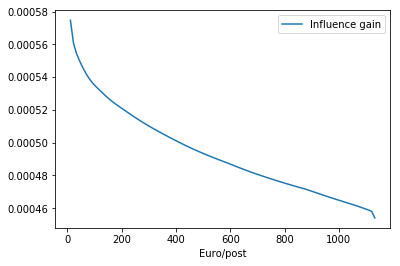

The maximun marginal influence gain found with 100 steps is with a budget of 11.325076904965012 Euro per time unit


In [25]:
Step=100
SizeE=OT/Step
OSX=list()
OSX.append(0)
for j in range(Step):
    aux=OSP(N,Lead,Lvec,Mvec,(j+1)*SizeE,1,i,Followers,restric,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)[0]
    OSX.append((sum(np.multiply(aux,OS[3]))-OS[3][i])/((j+1)*SizeE))
listaux=range(math.floor(OT))
listaux=[x*OT/Step for x in range(Step)]
listaux.append(OT)
del OSX[0]
del listaux[0]
datas={'Influence gain':OSX,'Euro/post':listaux}
df = pd.DataFrame(datas)
print("                   Marginal Utility")
df.plot(x='Euro/post',y='Influence gain')
plt.show()
print("The maximun marginal influence gain found with",Step,"steps is with a budget of",listaux[np.argmax(OSX)],"Euro per time unit")

## Reference

[1]. Giovanidis, A., Baynat, B., & Vendeville, A. (2019, April). Performance analysis of online social platforms. In IEEE INFOCOM 2019-IEEE Conference on Computer Communications (pp. 2413-2421). IEEE.